# The story behind Bank Loans. 
## by Ahmed Soliman

## Investigation Overview

> Identifing the Factors that reflect the terms of Payments and the variable that could have a direct relationship with the changes occurs.
> Answering some key questions like for example :
>>What factors affect a loan’s outcome status?
>>What affects the borrower’s APR or interest rate?
>>Are there differences between loans depending on how large the original loan amount was?

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others, We tried to minumize its scope to be around 20 Variables to be able to conduct our Most relevant insights.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df2 = pd.read_csv('prosperLoanData2.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Variation of Loan Amounts Across Timeline

> `As we van observe from this graph, it shows that the amount of loans are taking an increasing order year by year relative only the amount but it's density are consider on alow scale so the variablity intaked in this graph due to the low density for the higher amount of loans`

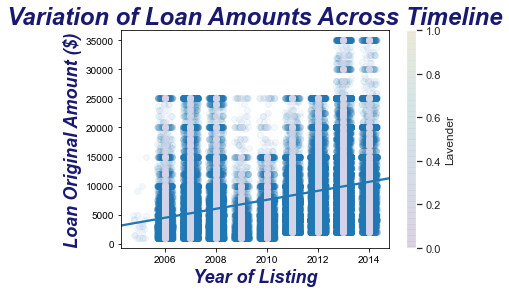

In [3]:
# Scatter plot
# The scatter_kws helps specifying the opaqueness of the data points
# The alpha take a value between [0-1], where 0 represents Transparent,and 1 is opaque.
sb.regplot(data = df2, x = 'LoanYear', y = 'LoanOriginalAmount',
truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = df2, x = 'LoanYear', y = 'LoanOriginalAmount', alpha=1/20 ,c = 'Lavender',
 cmap = 'viridis_r');
sb.set(rc={'figure.figsize':(20,15)})
plt.title('Variation of Loan Amounts Across Timeline',fontsize = 24,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.xlabel('Year of Listing',fontsize = 18 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.ylabel('Loan Original Amount ($)',fontsize = 18 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.colorbar(label = 'Lavender');

## Borrower Rate and the association of loss correlation
> `For the following graph we can see that the Borrower rate is highly corresponding to the estimated loss, it's positively correlated as the borrower rate increases it effect the estimation loss by relative increase as well; So loss is associated with a higher interest rate ( Borrower Rate)`

<Figure size 640x480 with 0 Axes>

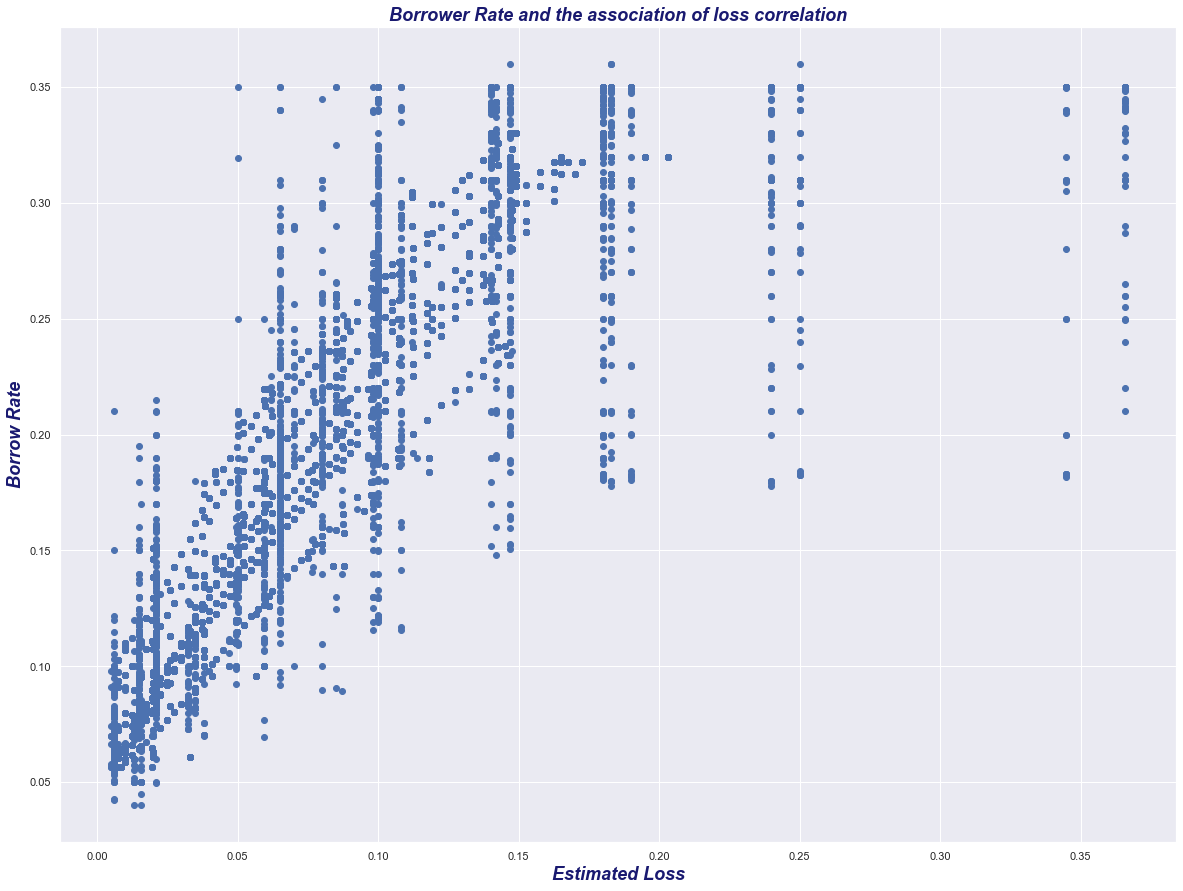

<Figure size 640x480 with 0 Axes>

In [4]:
# Scatter plot
plt.scatter(data = df2, x = 'EstimatedLoss', y = 'BorrowerRate');
plt.title('Borrower Rate and the association of loss correlation',fontsize = 18,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.xlabel('Estimated Loss',fontsize = 18 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.ylabel('Borrow Rate',fontsize = 18 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.figure(figsize=(8, 6), dpi=80)

## The Effect of the income range and employment status on the borrower imposed rate

> This graph show us the correlation between Income range and employment status on the interest rate, for example We can abserve the following from the graph it's highly appreciated to have source of income to be able to repay the debt, banks but in thier consideratiopn the folloing terms upon deciding which interest rate should be implemented depending on the follwong Creteria :- 
- Employment Status & income range which is a sign of solvency
 and the folloing figure depicts it with thier varios condition :
 example if the income of the borrower is 0 we can see from the grid color bar that the interest imposed is near to 24% which is consider the highest because of the it's high risk they impose a higher interest rate on them.


<Figure size 640x480 with 0 Axes>

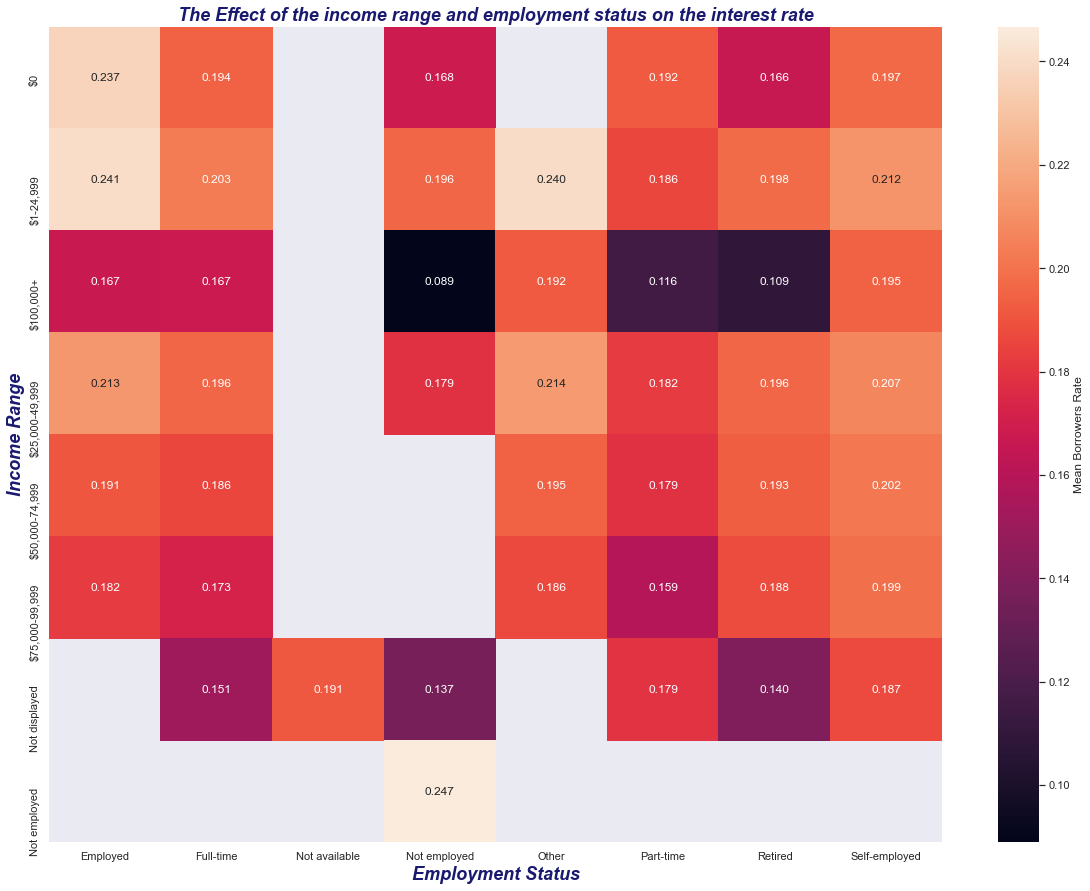

<Figure size 640x480 with 0 Axes>

In [5]:
Bor_rate = df2.groupby(['EmploymentStatus', 'IncomeRange']).mean()['BorrowerRate']
Bor_rate = Bor_rate.reset_index(name = 'BorrowersRate')
Bor_rate = Bor_rate.pivot(index = 'IncomeRange', columns = 'EmploymentStatus',
 values = 'BorrowersRate')
sb.heatmap(Bor_rate, annot = True, fmt = '.3f',
cbar_kws = {'label' : 'Mean Borrowers Rate'})
sb.set(rc={'figure.figsize':(18,14)})
plt.title('The Effect of the income range and employment status on the interest rate',fontsize = 18,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.xlabel('Employment Status',fontsize = 18 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.ylabel('Income Range',fontsize = 18 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.figure(figsize=(8, 6), dpi=80)


## The Frequency scale of Income Range/ Loan Status / Loan Original Amount with the most common categories.

> This graph Indicate the common categories in each of the variable that relativey effecing Each other and relative to the interest rate :- 
- Borrowers with the income slice range of 25,000 to 75,000 have the highest frequency of getting loans in our dataset.
- the loan status are current or completed for most of the loans represented.
- Employed borrowers with highest tendency of having loans specially if they're also considered full-time. 

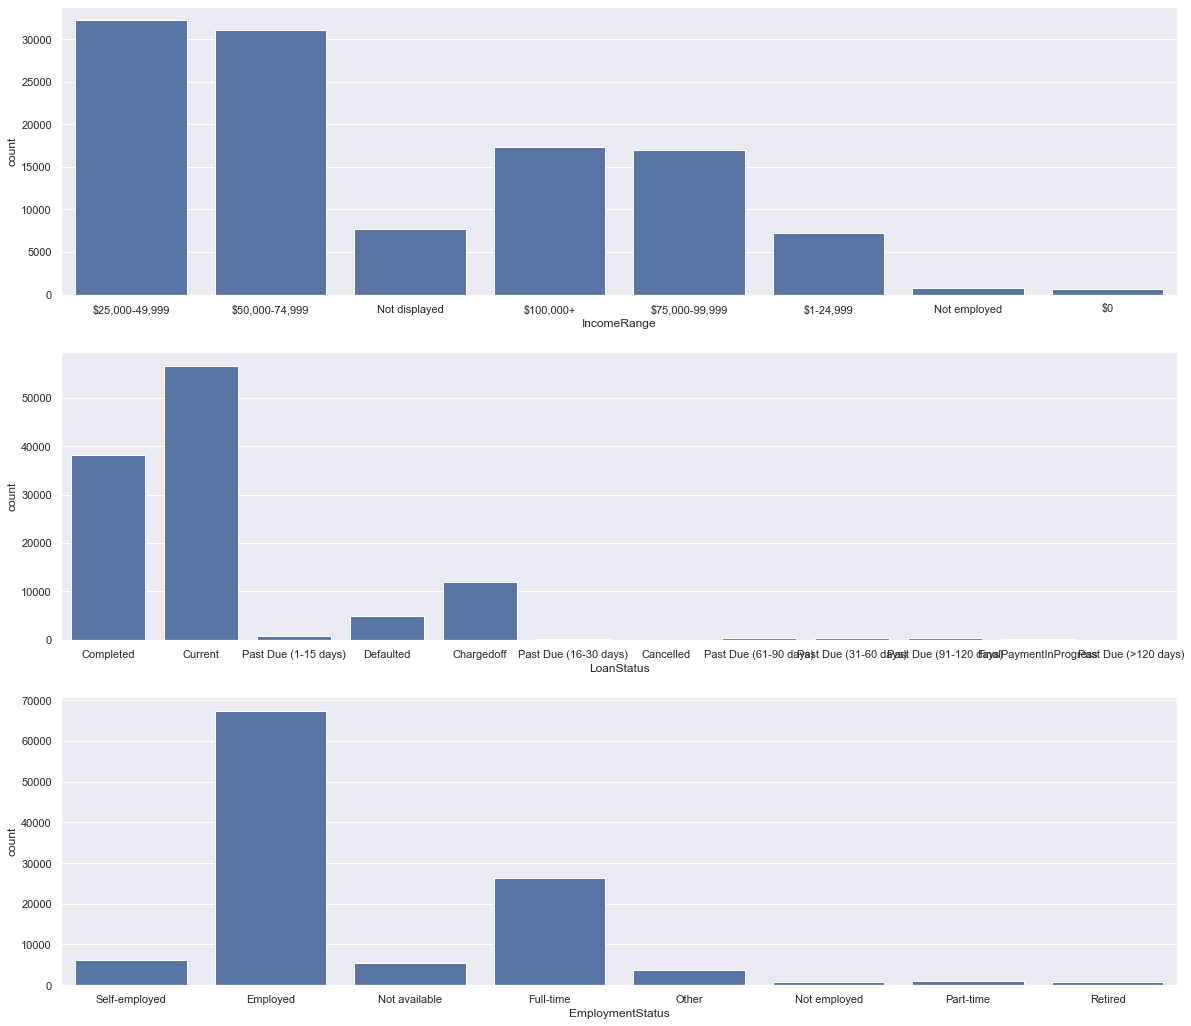

In [6]:
fig, ax = plt.subplots(nrows=3, figsize = [20,18])

default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'IncomeRange', color = default_color, ax = ax[0])
sb.countplot(data = df2, x = 'LoanStatus', color = default_color, ax = ax[1])
sb.countplot(data = df2, x = 'EmploymentStatus', color = default_color, ax = ax[2])
plt.show()

## The represention of a relatioship on the scale of Income Range/ Loan Status / Loan Original Amount

> `This graph represent 3 main variables we will try to explain the relationship and the effect of each vaariables in terms if relvancy and understanding with connecting the dots of the 3 variables together to understand thier mutual correlation`

- As we can observe the terms of the loan are expressed in Monthes with high frequency of occuring on the scale of 30-60 Month this is slightly reltive to the size of the loans if you noticed the first line of dots stops on the amount of 25,000 showing the term if only 12 Months as the amount the not that high and could be repaid but with higher amount of loan we finf that the terms could dlightly take a different ascending pattern depending on the amount of loan we can see it has a small correlation coefficient.

- the state of loan as well is effected by the amount of loan and the capapilty of paying it, we can see that at the epic point of the last 2 lines of the term 30 month and 60 month some loans has reached it's due date already. 

- the association of those variable is highly related to the credibilty of the borowers and the cababilty of genereating income or having a credit balance or an asset like a house ( which was aready given as variable in this dataset) 

- but because of the limitation we have on the scope of our analysis we can't explain the sequence without haveing interaption due to the need of making more toliared visuals and connecting more than a 2 or 3 dots together sometime could misslead and cause confusion.

Text(52.885221310763896, 0.5, 'Loan Original Amount')

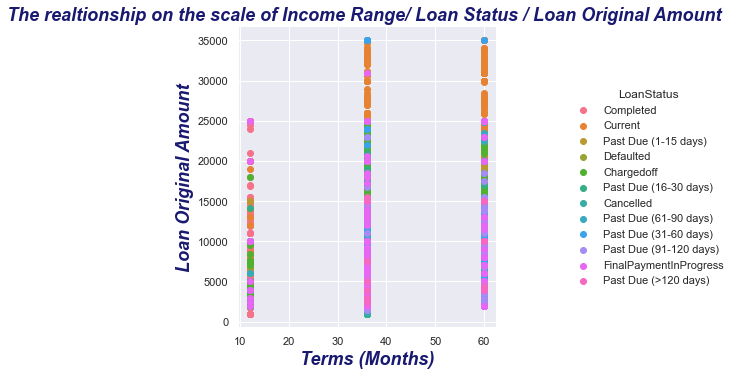

In [7]:
g = sb.FacetGrid(data = df2, hue = 'LoanStatus', size = 5)
g.map(plt.scatter, 'Term', 'LoanOriginalAmount')
g.add_legend()
plt.title('The realtionship on the scale of Income Range/ Loan Status / Loan Original Amount ',fontsize = 18,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.xlabel('Terms (Months)',fontsize = 18 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.ylabel('Loan Original Amount',fontsize = 18 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [8]:
!jupyter nbconvert Your_Slide_Deck_Name.ipynb --to slides --post serve  --no-input --no-prompt

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'Your_Slide_Deck_Name.ipynb' matched no files



    Equivalent to: [--TemplateExporter.template_file]
--writer=<DottedObjectName>
    Writer class used to write the  results of the conversion
    Default: 'FilesWriter'
    Equivalent to: [--NbConvertApp.writer_class]
--post=<DottedOrNone>
    PostProcessor class used to write the results of the conversion
    Default: ''
    Equivalent to: [--NbConvertApp.postprocessor_class]
--output=<Unicode>
    overwrite base name use for output files. can only be used when converting
    one notebook at a time.
    Default: ''
    Equivalent to: [--NbConvertApp.output_base]
--output-dir=<Unicode>
    Directory to write output(s) to. Defaults to output to the directory of each
    notebook. To recover previous default behaviour (outputting to the current
    working directory) use . as the flag value.
    Default: ''
    Equivalent to: [--FilesWriter.build_directory]
--reveal-prefix=<Unicode>
    The URL prefix for reveal.js (version 3.x). This defaults to the reveal CDN,
    but can be any url

In [9]:
import nbformat
from nbconvert import HTMLExporter

html_exporter = HTMLExporter(template_file="foo.tpl")
with open("foo.ipynb") as infile:
    nb = nbformat.read(infile, as_version=4)
    html = html_exporter.from_notebook_node(nb)
    print(html)

FileNotFoundError: [Errno 2] No such file or directory: 'foo.ipynb'

In [10]:
{% extends 'lab/index.html.j2' %}


SyntaxError: invalid syntax (<ipython-input-10-747aa8a7c043>, line 1)

In [12]:
File "/opt/conda/envs/worker_env/share/jupyter/nbconvert/templates/compatibility/full.tpl", line 2, in top-level template code
    {%- extends 'lab/index.html.j2' -%}
  File "/opt/conda/envs/worker_env/share/jupyter/nbconvert/templates/lab/index.html.j2", line 1, in top-level template code
    {%- extends 'base.html.j2' -%}
jinja2.exceptions.TemplateNotFound: base.html.j2

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [13]:
{
  "base_template": "lab",
  "mimetypes": {
    "text/html": true
  },
  "preprocessors": {
    "100-pygments": {
        "type": "nbconvert.preprocessors.CSSHTMLHeaderPreprocessor",
        "enabled": true
    },
    "500-reveal": {
      "type": "nbconvert.exporters.slides._RevealMetadataPreprocessor",
      "enabled": true
    }
  }
}

NameError: name 'true' is not defined

In [14]:
share/jupyter/nbconvert/templates/classic
├── static
│   └── styles.css
├── conf.json
├── index.html.j2
└── base.html.j2

SyntaxError: invalid character in identifier (<ipython-input-14-f6c80b050cea>, line 2)